_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


/home/loganathan001/tf_jupyter_gym/tf_jupyter_gym/lib/python3.6/site-packages/keras/callbacks.py:511: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 1s 2ms/step - loss: 0.7098 - acc: 0.4971 - val_loss: 0.6967 - val_acc: 0.4800
Epoch 2/100
700/700 [==============================] - 0s 65us/step - loss: 0.6756 - acc: 0.6343 - val_loss: 0.6658 - val_acc: 0.5567
Epoch 3/100
700/700 [==============================] - 0s 67us/step - loss: 0.5895 - acc: 0.7100 - val_loss: 0.5159 - val_acc: 0.8300
Epoch 4/100
700/700 [==============================] - 0s 49us/step - loss: 0.3828 - acc: 0.9057 - val_loss: 0.3235 - val_acc: 0.8900
Epoch 5/100
700/700 [==============================] - 0s 48us/step - loss: 0.2040 - acc: 0.9457 - val_loss: 0.2512 - val_acc: 0.8900
Epoch 6/100
700/700 [==============================] - 0s 48us/step - loss: 0.1377 - acc: 0.9557 - val_loss: 0.2020 - val_acc: 0.9000
Epoch 7/100
700/700 [==============================] - 0s 53us/step - loss: 0.1166 - acc: 0.9629 - val_loss: 0.1813 - val_acc: 0.9100
Epoch 8/100
700/7

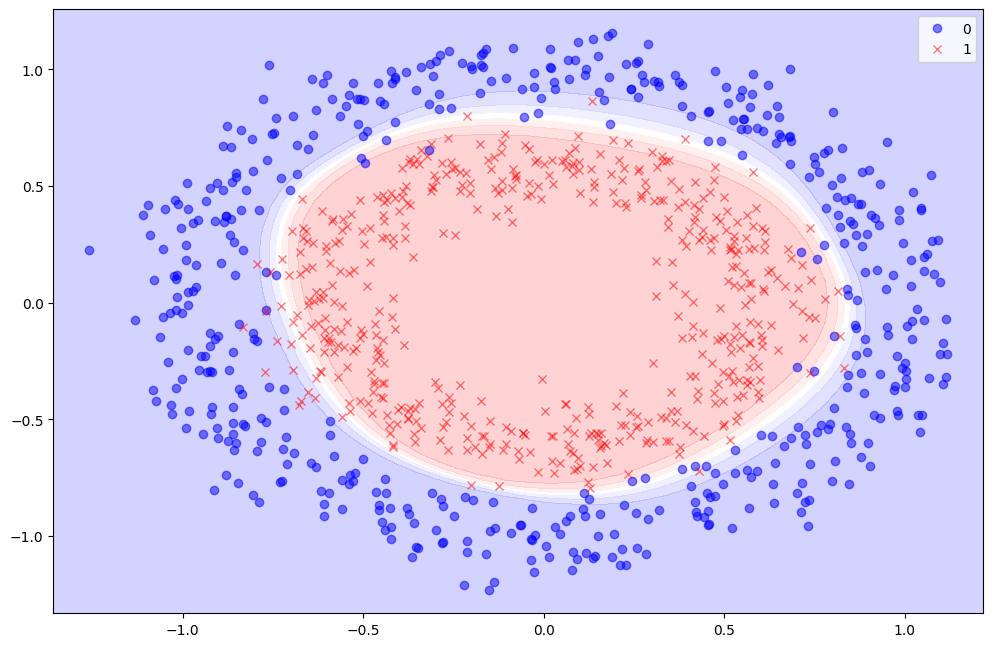

In [18]:
# Defines a network that can find separate data from two blobs of data from different classes

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import plot_model

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


plt.rcParams['figure.dpi'] = 50

def plot_data(pl, X, y):
    pl.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    pl.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl


def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    plt.figure(figsize=(12,8))
    
    plt.contourf(aa, bb, Z, cmap="bwr", alpha=0.2)
    
    plot_data(plt, X, y)
    
    return plt


X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)

#plt = plot_data(plt, X, y)
#plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(Dense(4, input_shape=(2,), activation="tanh", name="Hidden-1"))
model.add(Dense(4, activation="tanh", name="Hidden-2"))
model.add(Dense(1, activation="sigmoid", name="Output_Layer"))

model.summary()

model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])


plot_model(model, to_file="deep-circles-model.png", show_shapes=True, show_layer_names=True)

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))


from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor="val_acc", patience=5, mode=max)]


model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=my_callbacks, validation_data=(X_test, y_test))

eval_result = model.evaluate(X_test, y_test)

print("\n\nTest Loss:" , eval_result[0], "Test accuracy: ", eval_result[1])

plt = plot_decision_boundary(model, X, y)
#plt.show()

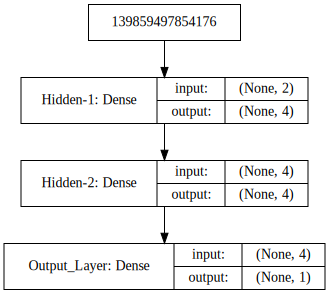

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))